<a href="https://colab.research.google.com/github/bugcaps/workjob/blob/main/5%EB%8B%A8%EA%B3%84_%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80%EC%A7%80%EB%8F%84%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브  연결
from google.colab import drive
drive.mount('/content/drvie')

import pandas as pd

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [ ]:
#한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

In [ ]:
apt = pd.read_csv('/content/drvie/MyDrive/apartHome/실거래가/2019_21_서울경기_40_130_GEO.csv')
apt.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
## 좌표값이 있고 서울인경우 데이터 추출
##temp =apt.loc[(pd.isna(apt['lon'])==False) & (apt.시군구.str.contains('서울특별시')) & (apt.계약년월.str.contains('2021')) ,:]
temp =apt.loc[(pd.isna(apt['lon'])==False) &  (apt.계약년월.str.contains('2021')) ,:]
temp

,동,단지명,group,전용면적,계약년월,계약일,금액,시군구,도로명,주소,locations,lon,lat
3,개포동,개포2차현대아파트(220),70 - 79,77.75,2021-04-01,15,174000,서울특별시 강남구 개포동,언주로 103,서울특별시 강남구 개포동 언주로 103,"(127.0528827, 37.481299500000006)",127.052883,37.481300
21,개포동,개포6차우성아파트1동~8동,70 - 79,79.97,2021-05-01,15,195000,서울특별시 강남구 개포동,언주로 3,서울특별시 강남구 개포동 언주로 3,"(127.05343671789691, 37.483371950000006)",127.053437,37.483372
22,개포동,개포6차우성아파트1동~8동,70 - 79,79.97,2021-08-01,11,200000,서울특별시 강남구 개포동,언주로 3,서울특별시 강남구 개포동 언주로 3,"(127.05343671789691, 37.483371950000006)",127.053437,37.483372
23,개포동,개포6차우성아파트1동~8동,70 - 79,79.97,2021-09-01,2,220000,서울특별시 강남구 개포동,언주로 3,서울특별시 강남구 개포동 언주로 3,"(127.05343671789691, 37.483371950000006)",127.053437,37.483372
33,개포동,개포우성3차,100 - 109,104.43,2021-01-01,5,220000,서울특별시 강남구 개포동,개포로 307,서울특별시 강남구 개포동 개포로 307,"(127.05575767360763, 37.4836782)",127.055758,37.483678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672823,향남읍,가림D동,80 - 89,82.42,2021-05-01,8,16450,경기도 화성시 향남읍 장짐리,푸른들판로 251-6,경기도 화성시 향남읍 장짐리 푸른들판로 251-6,"(126.9110772, 37.1357985)",126.911077,37.135798
672824,향남읍,가림D동,110 - 119,118.24,2021-06-01,11,23000,경기도 화성시 향남읍 장짐리,푸른들판로 251-6,경기도 화성시 향남읍 장짐리 푸른들판로 251-6,"(126.9110772, 37.1357985)",126.911077,37.135798
672825,향남읍,가림D동,80 - 89,84.73,2021-06-01,24,15000,경기도 화성시 향남읍 장짐리,푸른들판로 251-6,경기도 화성시 향남읍 장짐리 푸른들판로 251-6,"(126.9110772, 37.1357985)",126.911077,37.135798
672826,향남읍,가림D동,70 - 79,79.46,2021-10-01,16,16000,경기도 화성시 향남읍 장짐리,푸른들판로 251-6,경기도 화성시 향남읍 장짐리 푸른들판로 251-6,"(126.9110772, 37.1357985)",126.911077,37.135798


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text

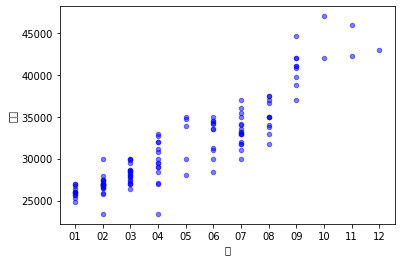

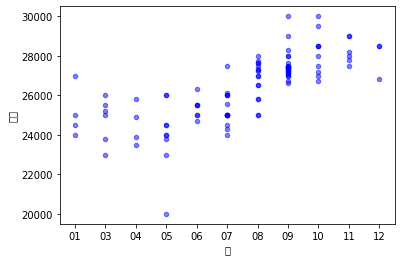

In [ ]:
def 단지별거래차트( 단지명):
  거래별단지내역= temp.loc[(apt.group.str.contains('80 - 89')) & (apt.단지명.str.contains(단지명)) ,:]
  거래별단지내역['월']=거래별단지내역['계약년월'].str.slice(start=5, stop=7)
  return 거래별단지내역.plot.scatter(x="월", y="금액",color='blue',  alpha=0.5)

단지별거래차트( '평택장안마을코오롱하늘채')
단지별거래차트( '평택브라운스톤험프리스')

In [ ]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672828 entries, 0 to 672827
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   동          672828 non-null  object 
 1   단지명        672828 non-null  object 
 2   group      672828 non-null  object 
 3   전용면적       672828 non-null  float64
 4   계약년월       672828 non-null  object 
 5   계약일        672828 non-null  int64  
 6   금액         672828 non-null  int64  
 7   시군구        672828 non-null  object 
 8   도로명        672828 non-null  object 
 9   주소         672828 non-null  object 
 10  locations  672828 non-null  object 
 11  lon        584364 non-null  float64
 12  lat        584364 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 66.7+ MB


## 2021년 면적 80~89 단위로 서울/경기도에서 매매가 많았던 top 400

In [ ]:
전용면적25 =temp.query('group== "80 - 89"')
전용면적25
동단위월평균 = 전용면적25.groupby(['단지명','시군구','lon','lat','locations'])['금액'].agg(['mean','max','min','count']).sort_values('count', ascending=False).reset_index()
단지top100 = 동단위월평균.head(400)  
단지top100

,단지명,시군구,lon,lat,locations,mean,max,min,count
0,한빛마을7단지,경기도 파주시 야당동,126.754123,37.709485,"(126.7541226, 37.7094853)",30101.415094,56000,21400,212
1,오포문형양우내안애아파트,경기도 광주시 오포읍 문형리,127.206136,37.337654,"(127.2061364,37.3376543)",43511.904762,50000,35000,126
2,평택장안마을코오롱하늘채,경기도 평택시 장안동,127.078771,37.056763,"(127.078771, 37.0567631)",31331.746032,47000,23400,126
3,평택용이금호어울림1단지,경기도 평택시 용이동,127.132130,37.001116,"(127.13213, 37.0011156)",38332.710280,50000,29000,107
4,평택브라운스톤험프리스,경기도 평택시 팽성읍 안정리,127.047568,36.965651,"(127.0475684, 36.9656515)",26413.207547,30000,20000,106
...,...,...,...,...,...,...,...,...,...
395,힐스테이트 상도 센트럴파크,서울특별시 동작구 상도동,126.947704,37.503161,"(126.9477038, 37.5031611)",148003.448276,162000,121000,29
396,SKVIEW,경기도 의정부시 가능동,127.038418,37.750255,"(127.0384178, 37.7502549)",47472.413793,55000,38000,29
397,삼환,경기도 수원권선구 구운동,126.978535,37.284095,"(126.9785353,37.2840946)",48873.214286,63000,32000,28
398,서동탄역더샵파크시티,경기도 오산시 외삼미동,127.051810,37.189695,"(127.0518103, 37.1896953)",65339.285714,75000,56000,28


In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt



In [ ]:
!pip install  folium   # 필요한 패키지설치

import folium

## 2021년 면적 80~89 단위로 서울/경기도에서 매매가 많았던 top 400 지도 정보
* 매매가 많았던 곳에는 원이 커지도록 설정
* ToolTip에는  아파트명, 매매가, 매매건수 표시 

In [ ]:
import matplotlib.dates as md
from matplotlib import colors as mcolors
map_osm = folium.Map(location=[37.566651, 126.978428], zoom_start=12)
Color = list(mcolors.TABLEAU_COLORS.keys())


for i in 단지top100.index:
  # 행 우선 접근 방식으로 값 추출하기
  name = 단지top100.loc[i, '단지명']
  lat = 단지top100.loc[i, 'lat']
  lng = 단지top100.loc[i, 'lon']
  count =   int(단지top100.loc[i, 'count'])
  매매가=str(round(float(단지top100.loc[i,'mean']/10000),2))+"억"
  count = int(단지top100.loc[i, 'count'])
  tooltipval = name + "<br>거래건수 : " + str(count) + "<br>매매가 : "  + 매매가 + "<br>" + 단지top100.loc[i, '시군구']
  # 추출한 정보를 지도에 표시
  folium.CircleMarker([lat,lng], 
                radius=max([10,count/5]), line_color='pink',fill_color='pink',
                fill_opacity=0.6,
                tooltip=tooltipval,
                 ).add_to(map_osm)

map_osm.save('/content/drvie/MyDrive/apartHome/실거래가/2021수도권.html')
map_osm
